In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/12-23대기오염nan처리.csv')

In [3]:
df.head(1)

,측정일시,이산화질소,오존,일산화탄소,아황산,미세,초미세
0,20120101,0.031,0.008,1.17,0.0093,88.3,57.3


In [4]:
df.tail(1)

,측정일시,이산화질소,오존,일산화탄소,아황산,미세,초미세
4303,20231211,0.015,0.0227,0.4,0.0024,7.2,3.0


In [5]:
df['측정일시'] = pd.to_datetime(df['측정일시'], format='%Y%m%d')

In [6]:
df.head(1)

,측정일시,이산화질소,오존,일산화탄소,아황산,미세,초미세
0,2012-01-01,0.031,0.008,1.17,0.0093,88.3,57.3


In [7]:
df = df.set_index('측정일시')

In [8]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2023-12-02', '2023-12-03', '2023-12-04', '2023-12-05',
               '2023-12-06', '2023-12-07', '2023-12-08', '2023-12-09',
               '2023-12-10', '2023-12-11'],
              dtype='datetime64[ns]', name='측정일시', length=4304, freq=None)

In [9]:
df.isna().sum()

이산화질소    0
오존       0
일산화탄소    0
아황산      0
미세       0
초미세      0
dtype: int64

In [10]:
df

,이산화질소,오존,일산화탄소,아황산,미세,초미세
측정일시,,,,,,
2012-01-01,0.031,0.0080,1.17,0.0093,88.3,57.3
2012-01-02,0.036,0.0050,1.20,0.0087,100.0,62.7
2012-01-03,0.041,0.0063,1.27,0.0073,96.0,63.0
2012-01-04,0.024,0.0130,0.83,0.0103,70.3,42.0
2012-01-05,0.037,0.0073,0.77,0.0063,53.3,29.3
...,...,...,...,...,...,...
2023-12-07,0.026,0.0184,0.50,0.0033,62.2,16.5
2023-12-08,0.029,0.0300,0.56,0.0031,84.2,22.8
2023-12-09,0.027,0.0379,0.61,0.0029,72.3,30.7


In [ ]:
df.head(1)

,이산화질소,오존,일산화탄소,아황산,미세,초미세
측정일시,,,,,,
2012-01-01,0.036,0.009,1.0,0.01,83.0,57.0


In [ ]:
df.columns

Index(['Unnamed: 0', '이산화질소', '오존', '일산화탄소', '아황산', '미세', '초미세'], dtype='object')

In [ ]:
df_feature =  df[['이산화질소', '오존', '일산화탄소', '아황산', '초미세','미세']]

In [ ]:
df_feature

,이산화질소,오존,일산화탄소,아황산,초미세,미세
측정일시,,,,,,
2012-01-01,0.036,0.009,1.0,0.010,57.0,83.0
2012-01-02,0.042,0.006,1.0,0.009,63.0,96.0
2012-01-03,0.046,0.007,1.0,0.008,63.0,93.0
2012-01-04,0.029,0.016,0.6,0.011,42.0,68.0
2012-01-05,0.044,0.009,0.7,0.007,29.0,52.0
...,...,...,...,...,...,...
2023-12-07,0.026,0.018,0.5,0.003,16.0,62.0
2023-12-08,0.029,0.030,0.6,0.003,23.0,84.0
2023-12-09,0.027,0.038,0.6,0.003,31.0,72.0


In [ ]:
df_target =  df[['미세']]

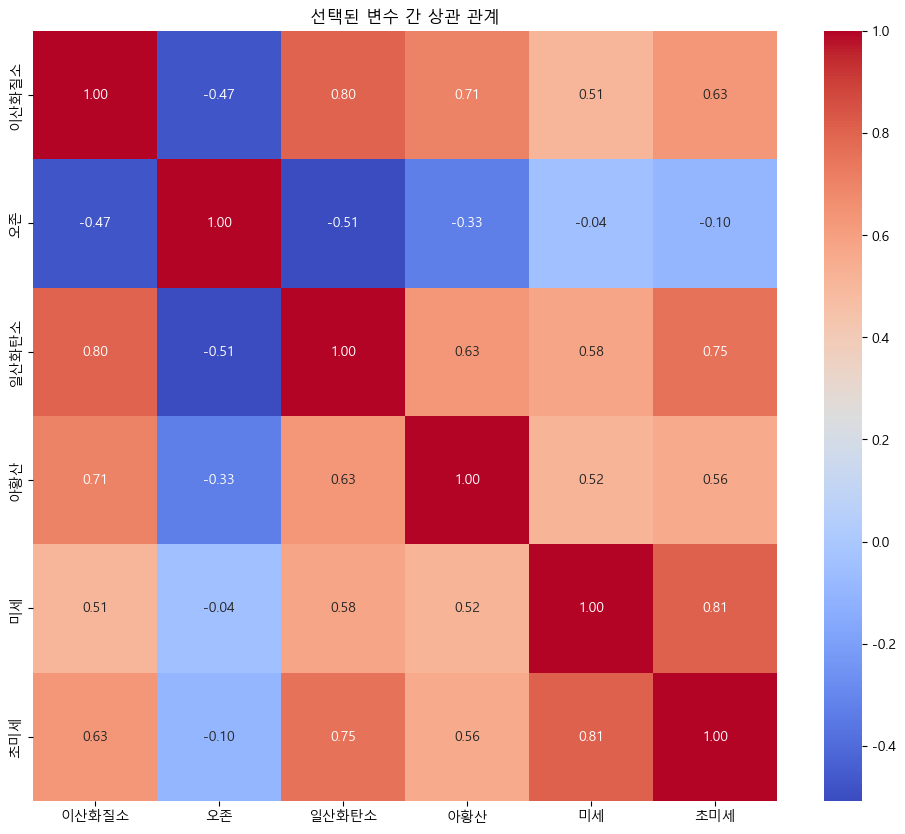

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 전체 상관관계 행렬 계산
full_corr_matrix = df.corr()

# 시각화용 상관관계 행렬 생성 (시간 및 도시 컬럼 제외)
visualization_columns = [col for col in df.columns if 'Year' not in col and 'Month' not in col and not col.startswith('SIDO')]
vis_corr_matrix = df[visualization_columns].corr()

# 상관 계수 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(vis_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('선택된 변수 간 상관 관계')
plt.show()

In [ ]:
df_feature.head(1)

,이산화질소,오존,일산화탄소,아황산,초미세
측정일시,,,,,
2012-01-01,0.036,0.009,1.0,0.01,57.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df_feature.columns , df_target.columns

(Index(['이산화질소', '오존', '일산화탄소', '아황산', '초미세', '미세'], dtype='object'),
 Index(['미세'], dtype='object'))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature.values, df_target.values, test_size=0.2, random_state=2023
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 결정계수(R Squared)
lr.score(X_test, y_test)

1.0

In [ ]:

from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
y_hat_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, y_hat_sv)
mse_sv = mean_squared_error(y_test, y_hat_sv)
r2_sv

0.8288632169974571

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
y_hat_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)
r2_rf

0.9986545254204773

In [ ]:
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
y_hat_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)
r2_rf

0.9986545254204773

In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2023,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth' : [1, 3, 5, 7], 
    'min_samples_leaf' : [1, 3, 5, 7],
    'min_samples_split' : [2, 3, 5, 7] }
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_ , grid_rfr.best_estimator_.score(X_test, y_test)

({'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.5782358691317517)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100,300,600]}
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_ , grid_rfr.best_estimator_.score(X_test, y_test)

({'n_estimators': 100}, 0.6644971966892542)

In [ ]:
grid_rfr.best_estimator_.score(X_test, y_test)

0.6644971966892542

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3, 6, 9,12]}
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_

{'max_depth': 3}

In [ ]:
grid_rfr.best_estimator_.score(X_test, y_test)

0.4127685028829484

In [ ]:
params = {'max_depth': [2,3,4,5]}
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_

{'max_depth': 2}

In [ ]:
grid_rfr.best_estimator_.score(X_test, y_test)

0.33250224999052924

In [ ]:
params = {'max_depth': [1,1.5,2]}
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_

{'max_depth': 1}

In [ ]:
grid_rfr.best_estimator_.score(X_test, y_test)

0.2489949618126286

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_hat_xgb = xgbr.predict(X_test)
r2_xgb = r2_score(y_test, y_hat_xgb)
mse_xgb = mean_squared_error(y_test, y_hat_xgb)
r2_xgb

0.6609139882424788

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
df.tail()

,이산화질소,오존,일산화탄소,아황산,미세,초미세
측정일시,,,,,,
2023-12-07,0.026,0.0184,0.50,0.0033,62.2,16.5
2023-12-08,0.029,0.0300,0.56,0.0031,84.2,22.8
2023-12-09,0.027,0.0379,0.61,0.0029,72.3,30.7
2023-12-10,0.025,0.0209,0.67,0.0029,80.2,35.6
2023-12-11,0.015,0.0227,0.40,0.0024,7.2,3.0


In [27]:
df.columns

Index(['이산화질소', '오존', '일산화탄소', '아황산', '미세', '초미세'], dtype='object')

In [45]:
from sklearn.preprocessing import MinMaxScaler

# 피쳐 및 타겟 분리
features = df[['이산화질소', '오존', '일산화탄소', '아황산', '초미세']]
target = df['미세']

# 피쳐 스케일링
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)

# 타겟 스케일링
scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))


In [46]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 30
n_features = features.shape[1]
generator = TimeseriesGenerator(features_scaled, target_scaled, length=n_input, batch_size=1)


In [47]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# EarlyStopping 콜백 설정 조기종료
early_stopping = EarlyStopping(monitor='loss', patience=10)


In [48]:
# 모델 훈련 with EarlyStopping
model.fit(generator, epochs=100, callbacks=[early_stopping])


Epoch 1/100


4274/4274 [==============================] - 30s 7ms/step - loss: 0.0019
Epoch 2/100
4274/4274 [==============================] - 29s 7ms/step - loss: 0.0016
Epoch 3/100
4274/4274 [==============================] - 29s 7ms/step - loss: 0.0016
Epoch 4/100
4274/4274 [==============================] - 29s 7ms/step - loss: 0.0016
Epoch 5/100
4274/4274 [==============================] - 29s 7ms/step - loss: 0.0016
Epoch 6/100
4274/4274 [==============================] - 30s 7ms/step - loss: 0.0016
Epoch 7/100
4274/4274 [==============================] - 30s 7ms/step - loss: 0.0016
Epoch 8/100
4274/4274 [==============================] - 29s 7ms/step - loss: 0.0015
Epoch 9/100
4274/4274 [==============================] - 29s 7ms/step - loss: 0.0015
Epoch 10/100
4274/4274 [==============================] - 29s 7ms/step - loss: 0.0015
Epoch 11/100
4274/4274 [==============================] - 29s 7ms/step - loss: 0.0015
Epoch 12/100
4274/4274 [==============================] - 29s 7ms/step - lo

In [33]:
df.tail()

,이산화질소,오존,일산화탄소,아황산,미세,초미세
측정일시,,,,,,
2023-12-07,0.026,0.0184,0.50,0.0033,62.2,16.5
2023-12-08,0.029,0.0300,0.56,0.0031,84.2,22.8
2023-12-09,0.027,0.0379,0.61,0.0029,72.3,30.7
2023-12-10,0.025,0.0209,0.67,0.0029,80.2,35.6
2023-12-11,0.015,0.0227,0.40,0.0024,7.2,3.0


In [49]:
from sklearn.metrics import r2_score

# 테스트 데이터셋 준비 (예시)
# 이 부분은 실제 데이터셋과 상황에 맞게 조정해야 합니다.
# test_features_scaled, test_target_scaled는 테스트 데이터의 스케일된 피쳐와 타겟입니다.
test_generator = TimeseriesGenerator(features_scaled , target_scaled, length=n_input, batch_size=1)

# 테스트 데이터셋에 대한 예측 수행
test_predictions = model.predict(test_generator)

# 예측값 역 스케일링
test_predictions_inverse = scaler_target.inverse_transform(test_predictions)

# 실제 타겟 값 역 스케일링
actual_target = scaler_target.inverse_transform(target_scaled[n_input:])

# R^2 값 계산
r2 = r2_score(actual_target, test_predictions_inverse)
print(f'R^2 Score: {r2}')


4274/4274 [==============================] - 11s 2ms/step
R^2 Score: 0.5005735436162553


In [50]:
# 최근 데이터를 사용한 예측
x_input = features_scaled[-n_input:]
x_input = x_input.reshape((1, n_input, n_features))
predicted = model.predict(x_input, verbose=0)

# 예측값 역 스케일링
predicted_inverse = scaler_target.inverse_transform(predicted)
print(predicted_inverse)


[[15.164758]]


In [22]:
# 데이터 스케일링
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# 데이터셋 생성
n_input = 1  # 입력으로 사용할 일 수
n_features = df.shape[1]  # 특성의 수
generator = TimeseriesGenerator(data_scaled, data_scaled, length=n_input, batch_size=1)

In [23]:
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(generator, epochs=100)

Epoch 1/100
4303/4303 [==============================] - 9s 2ms/step - loss: 0.0188
Epoch 2/100
4303/4303 [==============================] - 8s 2ms/step - loss: 0.0186
Epoch 3/100
4303/4303 [==============================] - 8s 2ms/step - loss: 0.0186
Epoch 4/100
4303/4303 [==============================] - 8s 2ms/step - loss: 0.0186
Epoch 5/100
4303/4303 [==============================] - 8s 2ms/step - loss: 0.0185
Epoch 6/100
4303/4303 [==============================] - 8s 2ms/step - loss: 0.0185
Epoch 7/100
4303/4303 [==============================] - 8s 2ms/step - loss: 0.0185
Epoch 8/100
4303/4303 [==============================] - 8s 2ms/step - loss: 0.0185
Epoch 9/100
4303/4303 [==============================] - 8s 2ms/step - loss: 0.0185
Epoch 10/100
4303/4303 [==============================] - 7s 2ms/step - loss: 0.0185
Epoch 11/100
4303/4303 [==============================] - 7s 2ms/step - loss: 0.0185
Epoch 12/100
4303/4303 [==============================] - 7s 2ms/step - lo

In [25]:
# 예측 결과 확장
predicted_expanded = np.zeros((1, 6))
predicted_expanded[0, 0] = predicted  # 첫 번째 특성에 예측값 할당, 나머지는 0

# 스케일 역변환
predicted_inverse = scaler.inverse_transform(predicted_expanded)
print(predicted_inverse[0, 0])  # 첫 번째 특성의 역변환된 값을 출력


0.016476395294070245


In [24]:
# 하루 뒤 예측
x_input = data_scaled[-n_input:]  # 마지막 데이터
x_input = x_input.reshape((1, n_input, n_features))
predicted = model.predict(x_input, verbose=0)

# 스케일 역변환
predicted = scaler.inverse_transform(predicted)
print(predicted)


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,6)

In [16]:


# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = df.values

# 데이터 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.9 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = df.index[:n_train]
test_dates = df.index[n_train:]

# 데이터셋 재구성
seq_len = 60  # 수치구성방법 총 데이터의수 20%가 최대치 (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 4])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 4])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# 예측 및 역변환
prediction = model.predict(testX)
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]




Epoch 1/30
108/108 [==============================] - 9s 43ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 2/30
108/108 [==============================] - 4s 38ms/step - loss: 0.0020 - val_loss: 9.8798e-04
Epoch 3/30
108/108 [==============================] - 5s 42ms/step - loss: 0.0017 - val_loss: 7.6178e-04
Epoch 4/30
108/108 [==============================] - 4s 40ms/step - loss: 0.0016 - val_loss: 7.9433e-04
Epoch 5/30
108/108 [==============================] - 4s 36ms/step - loss: 0.0015 - val_loss: 6.3849e-04
Epoch 6/30
108/108 [==============================] - 4s 35ms/step - loss: 0.0015 - val_loss: 7.5981e-04
Epoch 7/30
108/108 [==============================] - 4s 36ms/step - loss: 0.0015 - val_loss: 7.3303e-04
Epoch 8/30
108/108 [==============================] - 4s 35ms/step - loss: 0.0014 - val_loss: 7.6424e-04
Epoch 9/30
108/108 [==============================] - 4s 35ms/step - loss: 0.0015 - val_loss: 6.4766e-04
Epoch 10/30
108/108 [==============================] - 4s 3

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# R² 값 계산
r_squared = r2_score(testY_transformed, prediction_transformed)
# MSE 및 MAE 계산
mse = mean_squared_error(testY_transformed, prediction_transformed)
mae = mean_absolute_error(testY_transformed, prediction_transformed)


print("R-squared (Coefficient of Determination):", r_squared)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared (Coefficient of Determination): 0.32682585351060767
Mean Squared Error: 1.3305178309934127e-05
Mean Absolute Error: 0.002137832238375317


In [18]:
# 최신 데이터 시퀀스 추출
latest_seq_len = 60  # 예측에 사용할 최신 데이터의 길이
latest_data = test_data[-latest_seq_len:].reshape(1, latest_seq_len, input_dim)

# 예측 수행
latest_prediction = model.predict(latest_data)

# 예측 결과 역변환
latest_prediction_transformed = scaler.inverse_transform(np.concatenate((latest_prediction, np.zeros((latest_prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 예측된 결과 출력
predicted_value = latest_prediction_transformed[0]
print("최신 데이터에 대한 예측된 값:", predicted_value)


1/1 [==============================] - 0s 27ms/step
최신 데이터에 대한 예측된 값: 0.011555720355361702


In [20]:
latest_prediction[0]

array([0.05118787], dtype=float32)

In [31]:
df['오존']

측정일시
2012-01-01    0.0080
2012-01-02    0.0050
2012-01-03    0.0063
2012-01-04    0.0130
2012-01-05    0.0073
               ...  
2023-12-07    0.0184
2023-12-08    0.0300
2023-12-09    0.0379
2023-12-10    0.0209
2023-12-11    0.0227
Name: 오존, Length: 4304, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# R² 값 계산
r_squared = r2_score(testY_transformed, prediction_transformed)
# MSE 및 MAE 계산
mse = mean_squared_error(testY_transformed, prediction_transformed)
mae = mean_absolute_error(testY_transformed, prediction_transformed)


print("R-squared (Coefficient of Determination):", r_squared)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared (Coefficient of Determination): 0.14345537992452617
Mean Squared Error: 3.4053615925011035e-06
Mean Absolute Error: 0.001398751600554905


In [32]:
from keras.callbacks import EarlyStopping

# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = df.values

# 데이터 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.9 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = df.index[:n_train]
test_dates = df.index[n_train:]

# 데이터셋 재구성
seq_len = 100  # 수치구성방법 총 데이터의수 20%가 최대치 (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 0])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.008), loss='mse')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(trainX, trainY, epochs=130, batch_size=128, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# 예측
prediction = model.predict(testX)

# 예측값 역변환
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 실제 타겟값 역변환
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# R2 점수 계산
r2 = r2_score(testY_transformed, prediction_transformed)
print("R2 점수:", r2)


Epoch 1/130
27/27 [==============================] - 10s 244ms/step - loss: 0.0523 - val_loss: 0.0094
Epoch 2/130
27/27 [==============================] - 6s 216ms/step - loss: 0.0154 - val_loss: 0.0086
Epoch 3/130
27/27 [==============================] - 6s 208ms/step - loss: 0.0141 - val_loss: 0.0105
Epoch 4/130
27/27 [==============================] - 6s 215ms/step - loss: 0.0140 - val_loss: 0.0081
Epoch 5/130
27/27 [==============================] - 6s 212ms/step - loss: 0.0129 - val_loss: 0.0076
Epoch 6/130
27/27 [==============================] - 6s 209ms/step - loss: 0.0123 - val_loss: 0.0081
Epoch 7/130
27/27 [==============================] - 6s 211ms/step - loss: 0.0117 - val_loss: 0.0072
Epoch 8/130
27/27 [==============================] - 6s 215ms/step - loss: 0.0131 - val_loss: 0.0077
Epoch 9/130
27/27 [==============================] - 6s 224ms/step - loss: 0.0111 - val_loss: 0.0080
Epoch 10/130
27/27 [==============================] - 6s 218ms/step - loss: 0.0106 - val_l

In [33]:
# 최신 데이터 시퀀스 추출
latest_seq_len = 60  # 예측에 사용할 최신 데이터의 길이
latest_data = test_data[-latest_seq_len:].reshape(1, latest_seq_len, input_dim)

# 예측 수행
latest_prediction = model.predict(latest_data)

# 예측 결과 역변환
latest_prediction_transformed = scaler.inverse_transform(np.concatenate((latest_prediction, np.zeros((latest_prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 예측된 결과 출력
predicted_value = latest_prediction_transformed[0]
print("최신 데이터에 대한 예측된 값:", predicted_value)


1/1 [==============================] - 1s 722ms/step
최신 데이터에 대한 예측된 값: 0.02375040049850941


In [35]:
df.tail(5)

,이산화질소,오존,일산화탄소,아황산,미세,초미세
측정일시,,,,,,
2023-12-07,0.026,0.0184,0.50,0.0033,62.2,16.5
2023-12-08,0.029,0.0300,0.56,0.0031,84.2,22.8
2023-12-09,0.027,0.0379,0.61,0.0029,72.3,30.7
2023-12-10,0.025,0.0209,0.67,0.0029,80.2,35.6
2023-12-11,0.015,0.0227,0.40,0.0024,7.2,3.0


In [ ]:
model.save('NO2_model.h5')


In [ ]:
df.columns

Index(['이산화질소', '오존', '일산화탄소', '아황산', '미세', '초미세'], dtype='object')

In [ ]:
from keras.callbacks import EarlyStopping

# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = df.values

# 데이터 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.9 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = df.index[:n_train]
test_dates = df.index[n_train:]

# 데이터셋 재구성
seq_len = 100  # 수치구성방법 총 데이터의수 20%가 최대치 (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 1])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 1])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.008), loss='mse')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(trainX, trainY, epochs=130, batch_size=128, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# 예측
prediction = model.predict(testX)

# 예측값 역변환
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 실제 타겟값 역변환
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# R2 점수 계산
r2 = r2_score(testY_transformed, prediction_transformed)
print("R2 점수:", r2)


Epoch 1/130
27/27 [==============================] - 8s 191ms/step - loss: 0.0683 - val_loss: 0.0150
Epoch 2/130
27/27 [==============================] - 5s 172ms/step - loss: 0.0114 - val_loss: 0.0146
Epoch 3/130
27/27 [==============================] - 5s 169ms/step - loss: 0.0111 - val_loss: 0.0162
Epoch 4/130
27/27 [==============================] - 4s 165ms/step - loss: 0.0105 - val_loss: 0.0142
Epoch 5/130
27/27 [==============================] - 4s 165ms/step - loss: 0.0101 - val_loss: 0.0141
Epoch 6/130
27/27 [==============================] - 4s 164ms/step - loss: 0.0099 - val_loss: 0.0136
Epoch 7/130
27/27 [==============================] - 4s 166ms/step - loss: 0.0097 - val_loss: 0.0139
Epoch 8/130
27/27 [==============================] - 5s 177ms/step - loss: 0.0099 - val_loss: 0.0127
Epoch 9/130
27/27 [==============================] - 5s 169ms/step - loss: 0.0093 - val_loss: 0.0124
Epoch 10/130
27/27 [==============================] - 5s 168ms/step - loss: 0.0091 - val_lo

In [ ]:
model.save('model/O3_model.h5')  # 한글 이름 사용

In [ ]:
import numpy as np
import tensorflow as tf
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [44]:
df.columns

Index(['이산화질소', '오존', '일산화탄소', '아황산', '미세', '초미세'], dtype='object')

In [47]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import numpy as np

# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = df.values

# 데이터 정규화 (훈련 데이터에만 fit 적용)
scaler = MinMaxScaler()
n_train = int(0.8 * len(data))
train_data = data[:n_train]
test_data = data[n_train:]

scaler.fit(train_data)  # Fit only on training data
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

# 데이터셋 재구성
seq_len = 100
input_dim = train_data_scaled.shape[1]

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data_scaled)):
    trainX.append(train_data_scaled[i-seq_len:i, :])
    trainY.append(train_data_scaled[i, 5])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data_scaled)):
    testX.append(test_data_scaled[i-seq_len:i, :])
    testY.append(test_data_scaled[i, 5])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# 예측 및 역변환
prediction = model.predict(testX)
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data.shape[1]-1))), axis=1))[:,0]
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data.shape[1]-1))), axis=1))[:,0]

# R2 점수 계산
r2 = r2_score(testY_transformed, prediction_transformed)
print("R2 점수:", r2)


Epoch 1/100
84/84 [==============================] - 13s 106ms/step - loss: 0.0114 - val_loss: 0.0078
Epoch 2/100
84/84 [==============================] - 8s 96ms/step - loss: 0.0096 - val_loss: 0.0076
Epoch 3/100
84/84 [==============================] - 8s 93ms/step - loss: 0.0091 - val_loss: 0.0074
Epoch 4/100
84/84 [==============================] - 8s 97ms/step - loss: 0.0085 - val_loss: 0.0068
Epoch 5/100
84/84 [==============================] - 9s 107ms/step - loss: 0.0078 - val_loss: 0.0064
Epoch 6/100
84/84 [==============================] - 8s 93ms/step - loss: 0.0071 - val_loss: 0.0057
Epoch 7/100
84/84 [==============================] - 8s 93ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 8/100
84/84 [==============================] - 8s 93ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 9/100
84/84 [==============================] - 8s 97ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 10/100
84/84 [==============================] - 8s 96ms/step - loss: 0.0060 - val_loss: 0.0

In [49]:
ddddddddddddddd

NameError: name 'ddddddddddddddd' is not defined

In [48]:
def predict_next_day(model, initial_seq, seq_len, input_dim):
    current_seq = initial_seq.copy()
    current_seq_reshaped = current_seq.reshape(1, seq_len, input_dim)
    next_prediction = model.predict(current_seq_reshaped)

    return next_prediction[0, 0]

# 최신 데이터 시퀀스 준비
latest_seq_len = 100  # 예측에 사용할 최신 데이터의 길이
latest_data = test_data[-latest_seq_len:].reshape(seq_len, input_dim)

# 내일의 값 예측
predicted_value_for_next_day = predict_next_day(model, latest_data, seq_len, input_dim)

# 예측 결과 역변환
predicted_value_transformed = scaler.inverse_transform([[predicted_value_for_next_day] + [0] * (data_scaled.shape[1] - 1)])

print("내일의 예측된 값:", predicted_value_transformed[0, 0])


1/1 [==============================] - 0s 40ms/step
내일의 예측된 값: 0.05987326008081437


In [42]:
# 최신 데이터 시퀀스 추출
latest_seq_len = 100  # 예측에 사용할 최신 데이터의 길이
latest_data = test_data[-latest_seq_len:].reshape(1, latest_seq_len, input_dim)

# 예측 수행
latest_prediction = model.predict(latest_data)

# 예측 결과 역변환 (여기서 오류가 발생했을 수 있음)
latest_prediction_transformed = scaler.inverse_transform(np.concatenate((latest_prediction, np.zeros((latest_prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 예측된 결과 출력
predicted_value = latest_prediction_transformed[0]
print("최신 데이터에 대한 예측된 값:", predicted_value)


1/1 [==============================] - 0s 34ms/step


최신 데이터에 대한 예측된 값: 0.019941310375603587


In [ ]:
from keras.callbacks import EarlyStopping

# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = df.values

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.8 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = df.index[:n_train]
test_dates = df.index[n_train:]

# 데이터셋 재구성
seq_len = 100  # 수치구성방법 총 데이터의수 20%가 최대치 (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 4])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 4])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# 예측
prediction = model.predict(testX)

# 예측값 역변환
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 실제 타겟값 역변환
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# R2 점수 계산
r2 = r2_score(testY_transformed, prediction_transformed)
print("R2 점수:", r2)


Epoch 1/100
84/84 [==============================] - 8s 68ms/step - loss: 0.8003 - val_loss: 1.0866
Epoch 2/100
84/84 [==============================] - 5s 60ms/step - loss: 0.7199 - val_loss: 1.0379
Epoch 3/100
84/84 [==============================] - 5s 60ms/step - loss: 0.6574 - val_loss: 0.9857
Epoch 4/100
84/84 [==============================] - 5s 60ms/step - loss: 0.5886 - val_loss: 0.9220
Epoch 5/100
84/84 [==============================] - 5s 65ms/step - loss: 0.5633 - val_loss: 0.8786
Epoch 6/100
84/84 [==============================] - 5s 65ms/step - loss: 0.5409 - val_loss: 0.8371
Epoch 7/100
84/84 [==============================] - 5s 64ms/step - loss: 0.5381 - val_loss: 0.8572
Epoch 8/100
84/84 [==============================] - 6s 66ms/step - loss: 0.5234 - val_loss: 0.8312
Epoch 9/100
84/84 [==============================] - 5s 65ms/step - loss: 0.5208 - val_loss: 0.8248
Epoch 10/100
84/84 [==============================] - 5s 65ms/step - loss: 0.5104 - val_loss: 0.7927

In [ ]:
model.save('model/PM10_model.h5')  # 한글 이름 사용

In [ ]:
from keras.callbacks import EarlyStopping

# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = df.values

# 데이터 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.9 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = df.index[:n_train]
test_dates = df.index[n_train:]

# 데이터셋 재구성
seq_len = 70  # 수치구성방법 총 데이터의수 20%가 최대치 (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 2])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 2])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(trainX, trainY, epochs=120, batch_size=32, validation_split=0.15, verbose=1, callbacks=[early_stopping])

# 예측
prediction = model.predict(testX)

# 예측값 역변환
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 실제 타겟값 역변환
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# R2 점수 계산
r2 = r2_score(testY_transformed, prediction_transformed)
print("R2 점수:", r2)


Epoch 1/120
101/101 [==============================] - 5s 32ms/step - loss: 0.0160 - val_loss: 0.0082
Epoch 2/120
101/101 [==============================] - 3s 27ms/step - loss: 0.0127 - val_loss: 0.0088
Epoch 3/120
101/101 [==============================] - 3s 27ms/step - loss: 0.0124 - val_loss: 0.0076
Epoch 4/120
101/101 [==============================] - 3s 27ms/step - loss: 0.0122 - val_loss: 0.0071
Epoch 5/120
101/101 [==============================] - 3s 27ms/step - loss: 0.0119 - val_loss: 0.0069
Epoch 6/120
101/101 [==============================] - 3s 29ms/step - loss: 0.0118 - val_loss: 0.0068
Epoch 7/120
101/101 [==============================] - 3s 28ms/step - loss: 0.0118 - val_loss: 0.0072
Epoch 8/120
101/101 [==============================] - 3s 29ms/step - loss: 0.0116 - val_loss: 0.0069
Epoch 9/120
101/101 [==============================] - 3s 27ms/step - loss: 0.0117 - val_loss: 0.0071
Epoch 10/120
101/101 [==============================] - 3s 27ms/step - loss: 0.011

In [ ]:
model.save('model/co.h5')  # 한글 이름 사용

In [ ]:
df.columns

Index(['이산화질소', '오존', '일산화탄소', '아황산', '미세', '초미세'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer


In [ ]:
from keras.callbacks import EarlyStopping

# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = df.values

# 데이터 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.9 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = df.index[:n_train]
test_dates = df.index[n_train:]

# 데이터셋 재구성
seq_len = 100  # 수치길이는 1이 하루를 의미함 4계절 대한민국이라 그것을 참고해서 정함  (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 3])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 3])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# 예측
prediction = model.predict(testX)

# 예측값 역변환
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 실제 타겟값 역변환
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# R2 점수 계산
r2 = r2_score(testY_transformed, prediction_transformed)
print("R2 점수:", r2)


Epoch 1/100
54/54 [==============================] - 7s 83ms/step - loss: 0.0051 - val_loss: 4.9927e-04
Epoch 2/100
54/54 [==============================] - 4s 73ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 3/100
54/54 [==============================] - 4s 74ms/step - loss: 0.0031 - val_loss: 5.4146e-04
Epoch 4/100
54/54 [==============================] - 4s 73ms/step - loss: 0.0030 - val_loss: 4.3067e-04
Epoch 5/100
54/54 [==============================] - 4s 72ms/step - loss: 0.0030 - val_loss: 5.1402e-04
Epoch 6/100
54/54 [==============================] - 4s 75ms/step - loss: 0.0030 - val_loss: 5.0965e-04
Epoch 7/100
54/54 [==============================] - 4s 75ms/step - loss: 0.0029 - val_loss: 4.5977e-04
Epoch 8/100
54/54 [==============================] - 4s 73ms/step - loss: 0.0028 - val_loss: 5.7101e-04
Epoch 9/100
54/54 [==============================] - 4s 74ms/step - loss: 0.0028 - val_loss: 9.1865e-04
Epoch 10/100
54/54 [==============================] - 4s 75ms/step -

In [ ]:
model.save('SO2_model.h5')

In [ ]:
df.columns

Index(['이산화질소', '오존', '일산화탄소', '아황산', '미세', '초미세'], dtype='object')

이상치의 개수: 89
이상치 인덱스와 값:
측정일시
2012-01-01    0.010
2012-01-02    0.009
2012-01-04    0.011
2012-01-07    0.009
2012-01-08    0.009
              ...  
2015-03-15    0.009
2015-03-16    0.009
2015-03-17    0.011
2015-03-21    0.013
2018-02-27    0.009
Name: 아황산, Length: 89, dtype: float64


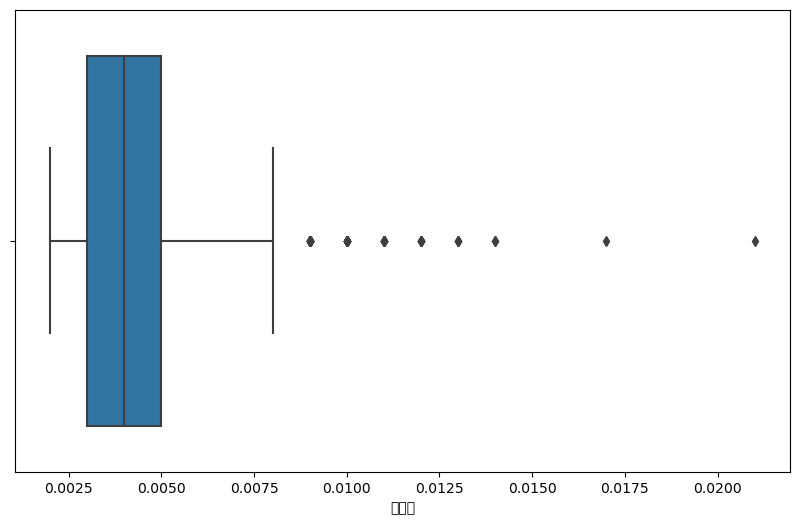

In [ ]:
import pandas as pd

# 데이터프레임 'df'와 컬럼 이름 'column_name'을 가정
column_name = 'your_column_name'
data = df['아황산']

# IQR 계산
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# 이상치 탐지
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# 이상치 출력
print("이상치의 개수:", outliers.sum())
print("이상치 인덱스와 값:")
print(data[outliers])

# 이상치 시각화 (선택적)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
plt.show()